# Exploratory Data Analysis

## Introduction

After cleaning the data we are going to take a look a it.

1. **Most common words -** Find them and create word clouds. See if anything needs to be removed.
2. **Size of vocabulary -** Look at the number of unique words used

## Most Common Words

### Analysis

In [136]:
import os
import pandas as pd
import numpy as np

from dotenv import load_dotenv

load_dotenv()

BASE_DIR = os.environ.get("BASE_DIR")
BEARER_TOKEN = os.environ.get("BEARER_TOKEN")

In [80]:
# Read in the document-term matrix

data = pd.read_pickle(f'{BASE_DIR}/data/interim/dtm.pkl')
data = data.T
data.head()

,DiarioElPeruano,ExpresoPeru,Gestionpe,diariocorreo,diarioojo,elcomercio_peru,larazon_pe,larepublica_pe,peru21noticias,tromepe
conoce,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
actividades,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
virtuales,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
desarrollarán,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aniversario,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Find the top 30 words used by each newspaper

top_dict = {}

for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))

top_dict

{'DiarioElPeruano': [('perú', 179.0),
  ('rt', 147.0),
  ('nacional', 139.0),
  ('normaslegales', 134.0),
  ('presidente', 133.0),
  ('ley', 119.0),
  ('año', 115.0),
  ('gobierno', 101.0),
  ('salud', 100.0),
  ('país', 97.0),
  ('lima', 95.0),
  ('minsaperu', 93.0),
  ('francisco', 87.0),
  ('diciembre', 87.0),
  ('pandemia', 86.0),
  ('sagasti', 82.0),
  ('congreso', 81.0),
  ('medidas', 76.0),
  ('ministerio', 76.0),
  ('titular', 75.0),
  ('ejecutivo', 71.0),
  ('millones', 71.0),
  ('años', 68.0),
  ('edición', 67.0),
  ('ministro', 67.0),
  ('atención', 65.0),
  ('ministros', 62.0),
  ('sector', 60.0),
  ('enero', 57.0),
  ('bermúdez', 56.0)],
 'ExpresoPeru': [('columna', 407.0),
  ('lea', 407.0),
  ('opinión', 346.0),
  ('perú', 123.0),
  ('lima', 103.0),
  ('luis', 103.0),
  ('sagasti', 103.0),
  ('congreso', 99.0),
  ('coronavirus', 95.0),
  ('vizcarra', 84.0),
  ('ley', 80.0),
  ('vacunas', 80.0),
  ('josé', 79.0),
  ('gobierno', 79.0),
  ('vacuna', 75.0),
  ('francisco', 72

From the lists I could see that there are some words that needed to be added to the stop words list before moving onto wordclouds, which I'll be using to review graphically the list of words. Still, just from looking at the list I could view that there where some words that ate common between journals so I will compare the lists and if more than half of the journals have it a a top word I'll add it to the list and remove it.

In [19]:
from collections import Counter

top_words = []

for newspaper in data.columns:
    top = [word for (word, _) in top_dict[newspaper]]
    for t in top:
        top_words.append(t)

Counter(top_words).most_common()

[('perú', 10),
 ('lima', 9),
 ('años', 9),
 ('enero', 9),
 ('coronavirus', 9),
 ('congreso', 8),
 ('año', 7),
 ('gobierno', 7),
 ('vacuna', 7),
 ('millones', 6),
 ('vacunas', 6),
 ('video', 6),
 ('pandemia', 5),
 ('trump', 5),
 ('casos', 5),
 ('presidente', 4),
 ('ley', 4),
 ('salud', 4),
 ('país', 4),
 ('medidas', 4),
 ('lee', 4),
 ('eeuu', 4),
 ('personas', 4),
 ('rt', 3),
 ('diciembre', 3),
 ('ministro', 3),
 ('columna', 3),
 ('opinión', 3),
 ('loúltimo', 3),
 ('minsa', 3),
 ('policía', 3),
 ('nacional', 2),
 ('francisco', 2),
 ('sagasti', 2),
 ('garcía', 2),
 ('alianza', 2),
 ('economía', 2),
 ('resumen', 2),
 ('fotos', 2),
 ('mensaje', 2),
 ('mujer', 2),
 ('lobatón', 2),
 ('denuncia', 2),
 ('samahara', 2),
 ('unidos', 2),
 ('capitolio', 2),
 ('madrid', 2),
 ('donald', 2),
 ('partido', 2),
 ('normaslegales', 1),
 ('minsaperu', 1),
 ('ministerio', 1),
 ('titular', 1),
 ('ejecutivo', 1),
 ('edición', 1),
 ('atención', 1),
 ('ministros', 1),
 ('sector', 1),
 ('bermúdez', 1),
 ('lea', 

In [108]:
new_stop_words = {word for word, count in Counter(top_words).most_common() if count > 5}
new_stop_words

{'año',
 'años',
 'congreso',
 'coronavirus',
 'enero',
 'gobierno',
 'lima',
 'millones',
 'perú',
 'vacuna',
 'vacunas',
 'video'}

In [84]:
import spacy

nlp = spacy.load('es')

In [127]:
spa_stopwords = nlp.Defaults.stop_words
spa_stopwords |= new_stop_words
spa_stopwords |= {
    "rt",
    "foto",
    "fotos",
    "politicalr",
    "deporteslr",
    "especial",
    "entrevista",
    "opinión",
    "opinion",
    "podcast",
    "envivo",
    "lrpodcast",
    "enportada",
    "loúltimo",
    "editoriallr",
    "crítica",
    "link",
    "editorial",
    "polidatos",
    "ahora",
    "opiniónelperuano",
    "editorialelperuano",
    "centralelperuano"
    "normaslegales",
    "vía",
    "caso",
    "trome",
    "resumen"
}

So, I can now re-do the document-term matrix with the new stop words.

In [98]:
data_dtm = pd.read_pickle(f'{BASE_DIR}/data/processed/corpus.pkl')

In [121]:
def normalize_text(text):
    doc = nlp(text)
    words = [t.orth_ for t in doc if not t.is_punct | t.is_stop | t.is_space]

    return words

normalize = lambda x: normalize_text(x)

In [122]:
data_dtm["doc"] = data_dtm["text_clean"].apply(normalize)

frecuency_df = []

for i, newspaper in enumerate(data_dtm.index):
    df = pd.DataFrame.from_dict(Counter(data_dtm.doc[newspaper]), orient='index', columns=[data_dtm.index[i]], dtype=np.int64).T
    frecuency_df.append(df)

dtm = pd.concat(frecuency_df, axis=1).fillna(0)

In [123]:
dtm

,conoce,actividades,virtuales,desarrollarán,aniversario,transmitido,facebook,youtube,ministra,defensa,...,plata,reniec,vencido,usarse,junio,raparle,enterarse,nieta,electrónica,lograron
DiarioElPeruano,16.0,25.0,7.0,2.0,6.0,1.0,3.0,2.0,40.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ExpresoPeru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gestionpe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
diariocorreo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
diarioojo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
elcomercio_peru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
larazon_pe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
larepublica_pe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
peru21noticias,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tromepe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [130]:
import pickle

dtm.to_pickle(f'{BASE_DIR}/data/processed/dtm_stop.pkl')

In [112]:
data_corpus = pd.read_pickle(f'{BASE_DIR}/data/processed/corpus.pkl')

In [113]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [128]:
wc = WordCloud(
    stopwords=spa_stopwords,
    background_color="white",
    colormap="plasma",
    font_path=f"{BASE_DIR}data/external/YuseiMagic-Regular.ttf",
    max_font_size=150,
    random_state=42
)

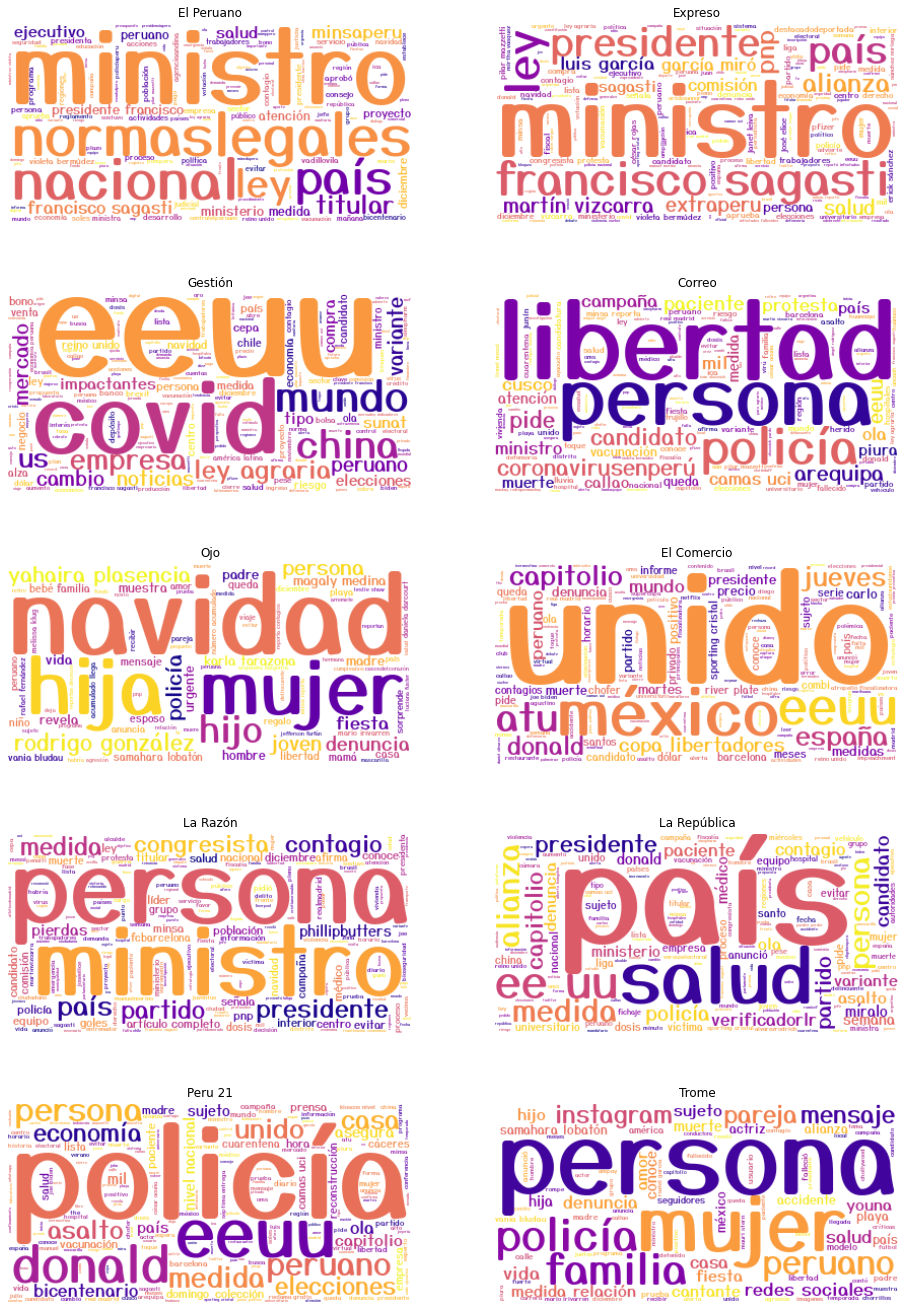

In [129]:
plt.rcParams['figure.figsize'] = [16, 24]

journal_names = [
    'El Peruano',
    'Expreso',
    'Gestión',
    'Correo',
    'Ojo',
    'El Comercio',
    'La Razón',
    'La República',
    'Peru 21',
    'Trome'
]

for index, newspaper in enumerate(data.columns):
    wc.generate(data_corpus.text_clean[newspaper])

    plt.subplot(5, 2, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(journal_names[index])

plt.savefig(f'{BASE_DIR}/src/visualization/wordcloud.png')
plt.show()

### Findings

#### Common among newspapers

Beside some onf the common words refering to a month or pointing to video, the other words commonly used in newspaper headlines pertain are related to some common successes that have occurred at the time. Such words are:

1. **congreso -** after the fall of Martñin Vizcarra's presidency, the country's congres has been under scrutiny
2. **coronavirus -** the name of the virus responsible for 2020's pandemic
3. **vacuna/vacunas -** the completition of the government's negociation for Covid vaccines has made headlines

**Año** is also common, but it might be related to the fact that this tweets where pulled from december and first two weeks of January.

#### Fun facts

1. The newspaper Ojo user more commonly names of people in their headlines than others.
2. Coverage for El Peruano doesn't have mention of the international situation of the USA as do the journals of the El Comercio Group.
3. La Razón is constantly speaking to it's reader in its tweets as you can find *estimados lectores*, as well as *mantente informado*, and also it's own hashtags

## Number of words

### Analysis

In [134]:
data = dtm.T

In [170]:
unique_list = []

# Identify the non-zero items in the document-term matrix
for newspaper in data.columns:
    uniques = data[newspaper].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new datafra,e that contains this unique word count
data_words = pd.DataFrame(list(zip(journal_names, unique_list)), columns=['newspaper', 'unique_words'])
data_words.set_index('newspaper', inplace=True)
data_words.sort_values(by='unique_words', ascending=False)

,unique_words
newspaper,
larepublica_pe,6585
DiarioElPeruano,6016
ExpresoPeru,5976
tromepe,5674
diarioojo,5221
diariocorreo,4937
Gestionpe,4934
larazon_pe,4375
peru21noticias,3841


since the number of unique words might be linked to the number of tweets, I will add a column with the number of tweets for each newspaper.

In [188]:
data_clean = pd.read_pickle(f"{BASE_DIR}/data/interim/data_clean.pkl")

In [146]:
journal_names = {
    'DiarioElPeruano':'El Peruano',
    'ExpresoPeru':'Expreso',
    'Gestionpe':'Gestión',
    'diariocorreo':'Correo',
    'diarioojo':'Ojo',
    'elcomercio_peru':'El Comercio',
    'larazon_pe':'La Razón',
    'larepublica_pe':'La República',
    'peru21noticias':'Peru 21',
    'tromepe':'Trome'
}

data_clean.replace(journal_names, inplace=True)

In [189]:
tweet_number = pd.DataFrame(data_clean.newspaper.value_counts())
tweet_number.rename(columns={'newspaper':'tweet_number'}, inplace=True)
tweet_number

,tweet_number
ExpresoPeru,2225
diarioojo,2039
Gestionpe,2036
diariocorreo,1884
tromepe,1775
DiarioElPeruano,1660
larepublica_pe,1403
peru21noticias,1043
larazon_pe,1004
elcomercio_peru,798


In [ ]:
data_words = data_words.join(tweet_number)

In [193]:
data_words["word_tweet_ratio"] = data_words["unique_words"]/data_words["tweet_number"]
data_words.sort_values(by='word_tweet_ratio', ascending=False)

,unique_words,tweet_number,word_tweet_ratio
newspaper,,,
larepublica_pe,6585,1403,4.693514
larazon_pe,4375,1004,4.357570
elcomercio_peru,3025,798,3.790727
peru21noticias,3841,1043,3.682646
DiarioElPeruano,6016,1660,3.624096
tromepe,5674,1775,3.196620
ExpresoPeru,5976,2225,2.685843
diariocorreo,4937,1884,2.620488
diarioojo,5221,2039,2.560569


In [168]:
data_words.to_pickle(f'{BASE_DIR}/data/processed/words_tweets.pkl')

<AxesSubplot:xlabel='unique_words', ylabel='tweet_number'>

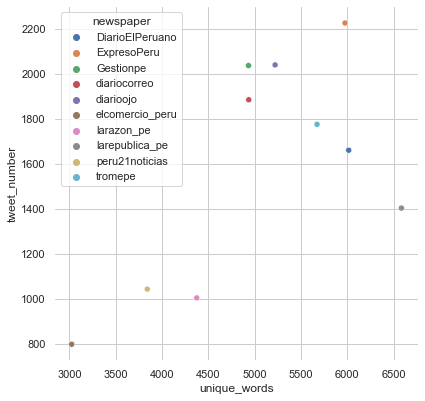

In [177]:
# Plot findings
import seaborn as sns
import matplotlib.pyplot as plt


f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(
    data = data_words,
    x = "unique_words",
    y = "tweet_number",
    hue = "newspaper",
    ax = ax
)